<a href="https://colab.research.google.com/github/Krishna-Bhatt/DeepLearning/blob/main/03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
 
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-05-27 09:38:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.250.73.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   145MB/s    in 0.7s    

2021-05-27 09:38:01 (145 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
import os

for dirpath,dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

there are 2 directories and 1 in pizza_steak
there are 2 directories and 1 in pizza_steak/test
there are 0 directories and 250 in pizza_steak/test/pizza
there are 0 directories and 250 in pizza_steak/test/steak
there are 2 directories and 1 in pizza_steak/train
there are 0 directories and 750 in pizza_steak/train/pizza
there are 0 directories and 750 in pizza_steak/train/steak


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_name = class_name[1:]
print(class_name)

['pizza' 'steak']


Image shape: (512, 512, 3)


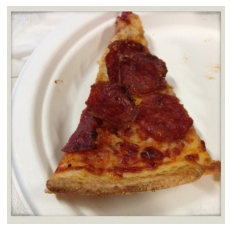

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir +"/"+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

img = view_random_image(target_dir="pizza_steak/train",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[223, 221, 209],
        [224, 222, 210],
        [225, 223, 211],
        ...,
        [229, 227, 215],
        [227, 225, 213],
        [222, 220, 208]],

       [[223, 221, 209],
        [223, 221, 209],
        [224, 222, 210],
        ...,
        [226, 224, 212],
        [226, 224, 212],
        [224, 222, 210]],

       [[223, 221, 209],
        [224, 222, 210],
        [224, 222, 210],
        ...,
        [222, 220, 208],
        [224, 222, 210],
        [223, 221, 209]],

       ...,

       [[220, 220, 208],
        [219, 219, 207],
        [218, 218, 206],
        ...,
        [221, 219, 207],
        [223, 221, 209],
        [221, 219, 207]],

       [[221, 221, 209],
        [220, 220, 208],
        [220, 220, 208],
        ...,
        [223, 221, 209],
        [225, 223, 211],
        [223, 221, 209]],

       [[222, 222, 210],
        [222, 222, 210],
        [222, 222, 210],
        ...,
        [221, 219, 20

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation ='relu',
                          input_shape=(224,224,3)),
   tf.keras.layers.Conv2D(10,3,activation ='relu'),
   tf.keras.layers.MaxPool2D(pool_size=2,
                             padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation ='relu'),
     tf.keras.layers.Conv2D(10,3,activation ='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')                                                                              
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 199ms/step - loss: 0.5464 - accuracy: 0.7167 - val_loss: 0.3816 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4231 - accuracy: 0.8153 - val_loss: 0.3627 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3827 - accuracy: 0.8340 - val_loss: 0.3123 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3528 - accuracy: 0.8547 - val_loss: 0.3346 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3271 - accuracy: 0.8667 - val_loss: 0.3779 - val_accuracy: 0.8220


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(224,224,3)), 
   tf.keras.layers.Dense(100,activation='relu'),
   tf.keras.layers.Dense(100,activation='relu'), 
   tf.keras.layers.Dense(100,activation='relu'),
   tf.keras.layers.Dense(1,activation='sigmoid'),                  
])

model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

h3 = model_3.fit(train_data,
                 epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data = valid_data,
                 validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 3.4370 - accuracy: 0.6407 - val_loss: 0.7274 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.7686 - accuracy: 0.7147 - val_loss: 0.4737 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.8356 - accuracy: 0.7033 - val_loss: 0.5172 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.9925 - accuracy: 0.6980 - val_loss: 0.5199 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5251 - accuracy: 0.7600 - val_loss: 0.5355 - val_accuracy: 0.7740


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


###Multiclass Image Classification
###1. Import data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-05-27 09:41:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.81.208, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   198MB/s    in 2.5s    

2021-05-27 09:41:18 (198 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"{len(dirnames)} : {len(filenames)} in {dirpath}")

2 : 0 in 10_food_classes_all_data
10 : 0 in 10_food_classes_all_data/test
0 : 250 in 10_food_classes_all_data/test/chicken_curry
0 : 250 in 10_food_classes_all_data/test/hamburger
0 : 250 in 10_food_classes_all_data/test/pizza
0 : 250 in 10_food_classes_all_data/test/chicken_wings
0 : 250 in 10_food_classes_all_data/test/sushi
0 : 250 in 10_food_classes_all_data/test/ramen
0 : 250 in 10_food_classes_all_data/test/ice_cream
0 : 250 in 10_food_classes_all_data/test/fried_rice
0 : 250 in 10_food_classes_all_data/test/grilled_salmon
0 : 250 in 10_food_classes_all_data/test/steak
10 : 0 in 10_food_classes_all_data/train
0 : 750 in 10_food_classes_all_data/train/chicken_curry
0 : 750 in 10_food_classes_all_data/train/hamburger
0 : 750 in 10_food_classes_all_data/train/pizza
0 : 750 in 10_food_classes_all_data/train/chicken_wings
0 : 750 in 10_food_classes_all_data/train/sushi
0 : 750 in 10_food_classes_all_data/train/ramen
0 : 750 in 10_food_classes_all_data/train/ice_cream
0 : 750 in 10_foo

In [ ]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
import pathlib 
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


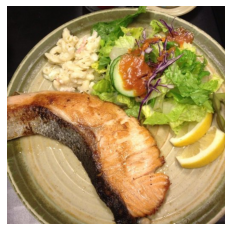

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))



###Preprocess data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###3. Create Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense 

model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation="relu"),    
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
]
    
)

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data) )

Epoch 1/5
235/235 [==============================] - 44s 184ms/step - loss: 2.1163 - accuracy: 0.2329 - val_loss: 1.9779 - val_accuracy: 0.2968
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.8430 - accuracy: 0.3584 - val_loss: 1.8543 - val_accuracy: 0.3636
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.4741 - accuracy: 0.5049 - val_loss: 1.9529 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 0.8325 - accuracy: 0.7273 - val_loss: 2.3920 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.2906 - accuracy: 0.9145 - val_loss: 3.6655 - val_accuracy: 0.2776


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 3.6655 - accuracy: 0.2776


[3.6655242443084717, 0.2775999903678894]

###6. Adjust the model

In [ ]:
model_9 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation="relu"),       
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),    
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
] 
)

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data) )



Epoch 1/5
235/235 [==============================] - 42s 177ms/step - loss: 2.2142 - accuracy: 0.2192 - val_loss: 2.0244 - val_accuracy: 0.2704
Epoch 2/5
235/235 [==============================] - 41s 175ms/step - loss: 1.7774 - accuracy: 0.3904 - val_loss: 1.8930 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 41s 175ms/step - loss: 1.3300 - accuracy: 0.5685 - val_loss: 2.1334 - val_accuracy: 0.2824
Epoch 4/5
235/235 [==============================] - 41s 175ms/step - loss: 0.8531 - accuracy: 0.7329 - val_loss: 2.2555 - val_accuracy: 0.3180
Epoch 5/5
235/235 [==============================] - 41s 174ms/step - loss: 0.4327 - accuracy: 0.8835 - val_loss: 2.7186 - val_accuracy: 0.3036


###Trying to fit data with augmented data

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10 = model_10.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data) )


Epoch 1/5
235/235 [==============================] - 43s 182ms/step - loss: 2.1692 - accuracy: 0.1897 - val_loss: 2.0452 - val_accuracy: 0.2464
Epoch 2/5
235/235 [==============================] - 42s 181ms/step - loss: 1.9097 - accuracy: 0.3275 - val_loss: 1.8589 - val_accuracy: 0.3496
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 1.4949 - accuracy: 0.4951 - val_loss: 2.0005 - val_accuracy: 0.3080
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 0.9197 - accuracy: 0.7005 - val_loss: 2.3414 - val_accuracy: 0.3024
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.3819 - accuracy: 0.8819 - val_loss: 3.2734 - val_accuracy: 0.2832


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 10s 125ms/step - loss: 2.7186 - accuracy: 0.3036


[2.718597173690796, 0.303600013256073]